# **Classificação de textos do Twitter com spaCy**

### Etapa 1: Bibliotecas

In [1]:
# Libs
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re
spacy.__version__

'2.2.3'

### Etapa 2: Carregamento da Base de dados

In [2]:
# dados
bd = pd.read_csv('./data/Train50.csv', sep=';')
bd.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [3]:
# tamanho da base de dados 
bd.shape

(50000, 5)

In [4]:
# Diminuído a base de dados com Amostragem Aleatória Simples
bd = bd.sample(n=5000)
bd.shape

(5000, 5)

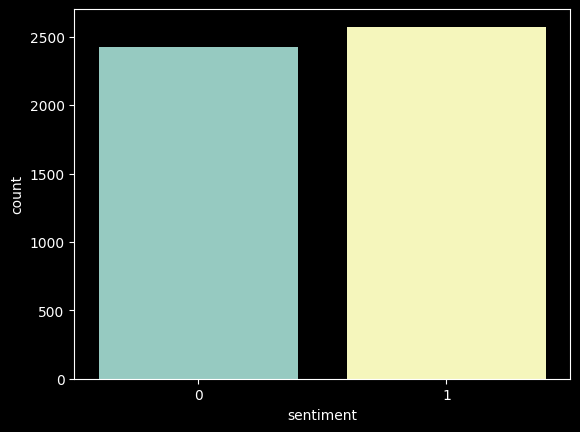

In [5]:
# gráficos de emoções 
sns.countplot(x=bd['sentiment'], label='Contagem');

### Etapa 3: Função para pré-processamento dos textos

In [6]:
# Variável para remover pontuações 
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Variável para remover as stop_words
from spacy.lang.pt.stop_words import STOP_WORDS

stop_words = STOP_WORDS
len(stop_words)

413

In [8]:
# Carregando o spacy
spacy.prefer_gpu()
pln = spacy.load("pt_core_news_sm")
pln

In [9]:
# Criação da função de processamento 
def preprocessamento(texto):
    # Letras minúsculas
    texto = texto.lower()

    # Nome do usuário
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

    # URLs
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

    # Espaços em branco
    texto = re.sub(r" +", ' ', texto)

    # Emoticons
    lista_emocoes = {':)': 'emocaopositiva',
                    ':d': 'emocaopositiva',
                    ':(': 'emocaonegativa'}
    for emocao in lista_emocoes:
        texto = texto.replace(emocao, lista_emocoes[emocao])

    # Lematização
    documento = pln(texto)

    lista = []
    for token in documento:
        lista.append(token.lemma_)
    
    # Stop words e pontuações
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [10]:
# testando a função
texto_teste = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

'  emocaopositiva parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

### Base de Teste

In [11]:
# Base de teste
bd_test = pd.read_csv('./data/Test.csv', sep=';')
bd_test.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [12]:
# Diminuído a base de dados com Amostragem Aleatória Simples
bd_test = bd_test.sample(n=5000)
bd_test.shape

(5000, 5)

### Etapa 4: Pré-processamento da base de dados

In [13]:
# Limpeza de dado
bd.head()

,id,tweet_text,tweet_date,sentiment,query_used
571,1050770840369926144,#VidadeLeiturista #Kampos #Quadrinhos #Comics ...,Fri Oct 12 15:31:05 +0000 2018,1,:)
43596,1046935459455275009,@meiolixo @ernestoararipe A frase do espelho: ...,Tue Oct 02 01:30:39 +0000 2018,0,:(
49213,1046773227933093888,@matilde_sines 😭 a minha música preferida era ...,Mon Oct 01 14:46:00 +0000 2018,0,:(
3025,1049315043395952646,antes olá :),Mon Oct 08 15:06:16 +0000 2018,1,:)
48690,1046780014455386112,@Thiagograneman poxa pra que isso amigo :(,Mon Oct 01 15:12:58 +0000 2018,0,:(


In [14]:
# Eliminando colunas desnecessárias
bd.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)
bd_test.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [15]:
# Limpeza
bd['tweet_text'] = bd['tweet_text'].apply(preprocessamento)
bd.head(10)

,tweet_text,sentiment
571,vidadeleiturista kampos quadro comic diadascri...,1
43596,o frase espelhar pelar verdade mundo viver c...,0
49213,😭 o músico preferir d álbum pqp emocaonegativa,0
3025,antar olá emocaopositiva,1
48690,poxa pra amigar emocaonegativa,0
48979,triste voltar — obrigar emocaonegativa,0
47453,humanar incrível emocaonegativa,0
17926,voi o mandar alv emocaopositiva,1
38859,quer9 catinho p cuidar emocaonegativa,0
240,days e inktuber emocaopositiva corvo e lua,1


In [16]:
# Limpeza da base de teste
bd_test['tweet_text'] = bd_test['tweet_text'].apply(preprocessamento)
bd.head(10)

,tweet_text,sentiment
571,vidadeleiturista kampos quadro comic diadascri...,1
43596,o frase espelhar pelar verdade mundo viver c...,0
49213,😭 o músico preferir d álbum pqp emocaonegativa,0
3025,antar olá emocaopositiva,1
48690,poxa pra amigar emocaonegativa,0
48979,triste voltar — obrigar emocaonegativa,0
47453,humanar incrível emocaonegativa,0
17926,voi o mandar alv emocaopositiva,1
38859,quer9 catinho p cuidar emocaonegativa,0
240,days e inktuber emocaopositiva corvo e lua,1


### Tratamento da Classe

In [17]:
# Transformando as variáveis
bd_final = []
for texto, emocao in zip(bd['tweet_text'], bd['sentiment']):
    if emocao == 1:
        dic = ({'POSITIVO': True, 'NEGATIVO': False})
    elif emocao == 0:
        dic = ({'POSITIVO': False, 'NEGATIVO': True})

    bd_final.append([texto, dic.copy()])

In [18]:
# Tamanho 
len(bd_final)

5000

In [19]:
# Visualizando a base de dado
bd_final[10:15]

[['triste medroso e bobinha emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['tbm querer emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['aproveitar pra sair hoje antar mãe matar e obrigar o parar o facu emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  querer parir o segundar turno infelizmente acontecer emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  tomar o democracia vencer o barbárie emocaopositiva nosdeste13 elenão fascismonunca',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [20]:
# Visualizando a toda base de dado
bd_final

[['vidadeleiturista kampos quadro comic diadascrianças feliz dia criança emocaopositiva ....',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  o frase espelhar pelar verdade mundo viver conquistar o universo dvd e sumir emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  😭 o músico preferir d álbum pqp emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['antar olá emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}],
 ['  poxa pra amigar emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['triste voltar — obrigar emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  humanar incrível emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['  voi o mandar alv emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}],
 ['  quer9 catinho p cuidar emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['days e inktuber emocaopositiva corvo e lua',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['triste medroso e bobinha emocaonegativa',
  {'POSITIVO

### Etapa 5: Criação do classificador

In [21]:
# Criação do modelo
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [22]:
# Treinado o modelo
modelo.begin_training()
for epoca in range(15):
    random.shuffle(bd_final)
    losses = {}
    for batch in spacy.util.minibatch(bd_final, 512):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        modelo.update(textos, annotations, losses=losses)
        historico.append(losses)
    if epoca % 5 == 0:
        print(losses)

{'textcat': 8.817124069082638e-06}
{'textcat': 7.946625507626592e-08}
{'textcat': 3.859686906887427e-08}


In [23]:
# Armazenando os valores dos resultados
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [24]:
# convertendo para um array
historico_loss = np.array(historico_loss)
historico_loss

array([8.81712407e-06, 8.81712407e-06, 8.81712407e-06, 8.81712407e-06,
       8.81712407e-06, 8.81712407e-06, 8.81712407e-06, 8.81712407e-06,
       8.81712407e-06, 8.81712407e-06, 6.29036599e-07, 6.29036599e-07,
       6.29036599e-07, 6.29036599e-07, 6.29036599e-07, 6.29036599e-07,
       6.29036599e-07, 6.29036599e-07, 6.29036599e-07, 6.29036599e-07,
       1.72963725e-07, 1.72963725e-07, 1.72963725e-07, 1.72963725e-07,
       1.72963725e-07, 1.72963725e-07, 1.72963725e-07, 1.72963725e-07,
       1.72963725e-07, 1.72963725e-07, 9.58117202e-08, 9.58117202e-08,
       9.58117202e-08, 9.58117202e-08, 9.58117202e-08, 9.58117202e-08,
       9.58117202e-08, 9.58117202e-08, 9.58117202e-08, 9.58117202e-08,
       7.34472556e-08, 7.34472556e-08, 7.34472556e-08, 7.34472556e-08,
       7.34472556e-08, 7.34472556e-08, 7.34472556e-08, 7.34472556e-08,
       7.34472556e-08, 7.34472556e-08, 7.94662551e-08, 7.94662551e-08,
       7.94662551e-08, 7.94662551e-08, 7.94662551e-08, 7.94662551e-08,
      

Text(0, 0.5, 'Erro')

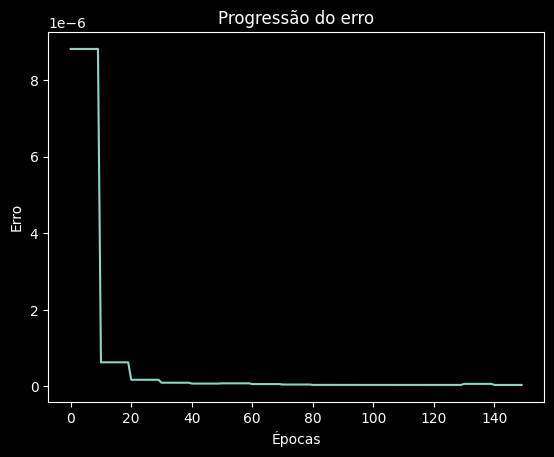

In [25]:
# Visualizando a regressão do erro
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [26]:
# Salvando o modelo
modelo.to_disk('modelo')